In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
cap = cv2.VideoCapture("12.avi")

In [51]:
while not cap.isOpened():
    cap = cv2.VideoCapture("12.avi")
    cv2.waitKey(1000)
    print("Wait for the header")

In [52]:
pos_frame = cap.get(cv2.CAP_PROP_POS_FRAMES)
fps = cap.get(cv2.CAP_PROP_FPS)

In [53]:
# https://www.pyimagesearch.com/2015/03/09/capturing-mouse-click-events-with-python-and-opencv/
refPt = []
cropping = False
title = "press 'n' for next, 'r' to reset, 'c' to stop"

In [54]:
def click_and_crop(event, x, y, flags, param):
    # grab references to the global variables
    global refPt, cropping
    
    # if the left mouse button is pressed, record the starting (x, y)
    # coordinates and indicate that cropping is being performed
    if event == cv2.EVENT_LBUTTONDOWN:
        refPt = [(x, y)]
        cropping = True
    
    # check to see if the left mouse button was released
    elif event == cv2.EVENT_LBUTTONUP:
        # record the ending (x, y) coordinates and indicate that
        # the cropping operation is finished
        refPt.append((x, y))
        cropping = False
        
        # draw a rectangle around the region of interest
        cv2.rectangle(image, refPt[0], refPt[1], (0, 255, 0), 2)
        cv2.imshow(title , image)

In [ ]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True, help="Path to the image")
# args = vars(ap.parse_args())
 
# load the image, clone it, and setup the mouse callback function
flag, image = cap.read() 
clone = image.copy()
cv2.namedWindow(title)
cv2.setMouseCallback(title, click_and_crop)
 
# keep looping until the 'q' key is pressed
while True:

    # display the image and wait for a keypress
    cv2.imshow(title, image)
    key = cv2.waitKey(1) & 0xFF
 
    # if the 'n' key is pressed, give a frame after 1 sec
    # for reselecting ROI
    if key == ord("n"):
        if cap.get(cv2.CAP_PROP_POS_FRAMES) + fps >= cap.get(cv2.CAP_PROP_FRAME_COUNT):
            print("No more frames!")
            break
        pos_frame = pos_frame + fps
        cap.set(cv2.CAP_PROP_POS_FRAMES, pos_frame)
        flag, image = cap.read()
        clone = image.copy()
        cv2.namedWindow(title)
        cv2.setMouseCallback(title, click_and_crop)
    
    
    # if the 'r' key is pressed, reset the cropping region
    if key == ord("r"):
        image = clone.copy()
 
    # if the 'c' key is pressed, break from the loop
    elif key == ord("c"):
        break
 
# if there are two reference points, then crop the region of interest
# from teh image and display it
if len(refPt) == 2:
    roi = clone[refPt[0][1]:refPt[1][1], refPt[0][0]:refPt[1][0]]
    cv2.imshow("ROI", roi)
    cv2.waitKey(0)
 
# close all open windows
cv2.destroyAllWindows()

In [19]:
ref_frame_pos = pos_frame

In [20]:
print("Ref frame:", ref_frame_pos)
print("ROI: ", refPt[0]," ", refPt[1])

Ref frame: 1539.0
ROI:  (247, 247)   (291, 276)


In [21]:
def calculateDistance(first, second):
    x = second[0] - first[0]
    y = second[1] - first[1]
    return (x**2.0 + y**2.0)**0.5

In [30]:
cap.set(cv2.CAP_PROP_POS_FRAMES, ref_frame_pos)
signal = np.array([])
while True:
    flag, frame = cap.read()
    key = cv2.waitKey(100) & 0xFF
    if key == ord("q"):
        break
    if flag:
        pos_frame = cap.get(cv2.CAP_PROP_POS_FRAMES)
        roi = frame[refPt[0][1]:refPt[1][1], refPt[0][0]:refPt[1][0]]
        roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        M = cv2.moments(roi_gray)
        cX = (M["m10"] / M["m00"])
        cY = (M["m01"] / M["m00"])
        print(cX, cY)
        dist = calculateDistance(refPt[0], (cX, cY))
        signal = np.append(signal, dist)
        cv2.rectangle(frame, refPt[0], refPt[1], (0,0,255), 2)
        cv2.imshow("Extracting Signal", frame)
    else:
        cap.set(cv2.CAP_PROP_POS_FRAMES, pos_frame-1)
        print("frame is not ready")
    if cap.get(cv2.CAP_PROP_POS_FRAMES) == cap.get(cv2.CAP_PROP_FRAME_COUNT):
        # If the number of captured frames is equal to the total number of frames,
        # we stop
        break
cv2.destroyAllWindows()

21.025611625951555 14.038948016852594
21.03759625751677 14.025623559238692
21.02458746840974 14.029939229580643
21.037932366976104 14.036925869676573
21.036080274229853 14.037118070686967
21.036281953367176 14.03716698863381
21.036281953367176 14.03716698863381
21.036281953367176 14.03716698863381
21.036281953367176 14.03716698863381
20.9292026642321 14.063322734570706
20.920609043786843 14.069105123551585
20.918485824306977 14.066930889274213
20.909298052848676 14.068024208800908
20.929228048441104 14.065241981093964
20.933810592459604 14.064057450628367
20.933293236862422 14.06381622650317
20.933600833019156 14.064262760094074
20.933600833019156 14.064262760094074
20.98560845139775 14.051737952953289
20.958128067776855 14.053916668534415
20.964672428462674 14.07840669920738
20.980338967851857 14.072111375151325
20.981574712076856 14.073212500504342
20.981574712076856 14.073212500504342
20.999063020856795 14.088202171268977
20.999063020856795 14.088202171268977
20.999063020856795 14.0

21.270679779921196 14.05939780733626
21.271769941862566 14.058272848734337
21.274662172846423 14.056433286196413
21.28155664534792 14.056001265565323
21.285557274281526 14.05470071553276
21.275050612992096 14.075777456139164
21.240288089748944 14.061157804926752
21.23520942527274 14.05012853470437
21.245670990763873 14.04549597138025
21.244352261135667 14.045653405871018
21.244352261135667 14.045653405871018
21.24442600803344 14.04581599252872
21.24442600803344 14.04581599252872
21.24442600803344 14.04581599252872
21.333312330665994 14.06497925236505
21.322485499308637 14.060893924973513
21.317071639354555 14.05857528545417


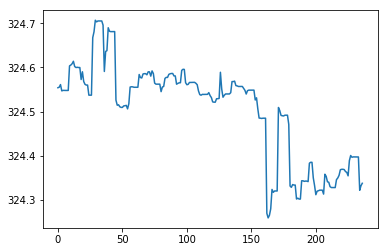

In [31]:
plt.plot(signal)

In [32]:
signal

array([ 324.55396461,  324.5551848 ,  324.56114414,  324.54683779,
        324.54798932,  324.54781379,  324.54781379,  324.54781379,
        324.54781379,  324.60360599,  324.60544173,  324.60848069,
        324.61409528,  324.60221106,  324.59986957,  324.60040298,
        324.59986832,  324.59986832,  324.57263899,  324.59021181,
        324.56807905,  324.5616867 ,  324.5600359 ,  324.5600359 ,
        324.5370997 ,  324.5370997 ,  324.5370997 ,  324.66773168,
        324.681216  ,  324.70726064,  324.7035464 ,  324.70562355,
        324.70562355,  324.70562355,  324.70562355,  324.69621382,
        324.59090802,  324.6364178 ,  324.63812329,  324.69022847,
        324.68215201,  324.68139948,  324.68149736,  324.68149736,
        324.68149736,  324.52578603,  324.51426663,  324.51525797,
        324.51078536,  324.5093228 ,  324.5093228 ,  324.51266086,
        324.5130786 ,  324.51393363,  324.50596275,  324.51774311,
        324.55548747,  324.55618087,  324.55595501,  324.55504

In [33]:
w = np.fft.fft(signal)
freqs = np.fft.fftfreq(len(w))
print(freqs.min(), freqs.max())

-0.497890295359 0.497890295359


In [34]:
# Find the peak in the coefficients
max(freqs)

0.49789029535864976

(-1, 5)

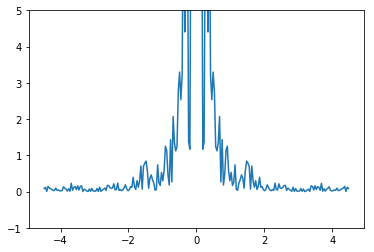

In [42]:
from __future__ import division
ps = np.abs(np.fft.fft(signal))**2

time_step = 1 / 9
freqs = np.fft.fftfreq(signal.size, time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps[idx])
plt.ylim(-1, 5)

In [36]:
max(freqs)

4.481012658227848

In [43]:
signaltransformed = signal - np.mean(signal)

(-1, 5)

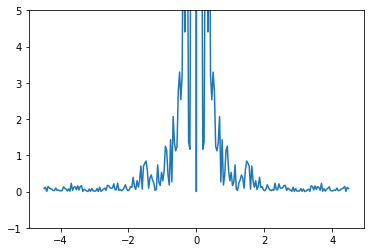

In [45]:
ps1 = np.abs(np.fft.fft(signaltransformed))**2
freqs = np.fft.fftfreq(signaltransformed.size, time_step)
idx = np.argsort(freqs)

plt.plot(freqs[idx], ps1[idx])
plt.ylim(-1, 5)

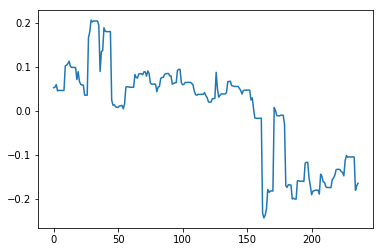

In [46]:
plt.plot(signaltransformed)

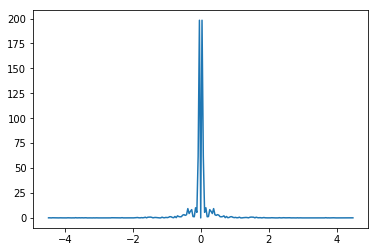

In [48]:
plt.plot(freqs[idx], ps1[idx])